# Business Understanding

   When trying to sell a home, the square footage, number of bathrooms, and number of bedrooms are important factors to consider when making renovations before selling a home for several reasons:
1. Market demand: The size of a home, as indicated by its square footage, is a key factor that affects market demand. Buyers often have specific space requirements based on their lifestyle and family needs. Renovations that increase the square footage, such as adding an extension or finishing a basement, can expand the home's appeal and attract a wider range of potential buyers.
2. Functional and practical considerations: The number of bathrooms and bedrooms directly impacts a home's functionality and practicality. Buyers typically seek homes with an adequate number of bedrooms to accommodate their family members or provide additional space for guests. Similarly, having an appropriate number of bathrooms is crucial for convenience and privacy. Renovations that add or modify bedrooms and bathrooms can significantly improve the home's functionality, increasing its value and marketability.
3. Comparative market analysis: The square footage, number of bedrooms, and number of bathrooms are essential criteria used in comparative market analysis (CMA) to determine the value of a home. Appraisers and real estate agents consider these factors when assessing the value of a property and comparing it to similar homes in the area. Renovations that align with these criteria can positively impact the home's appraised value and make it more competitive in the market.
4. Buyer expectations: Buyers often have specific expectations regarding the size and layout of a home. The number of bedrooms and bathrooms can be critical factors in meeting those expectations. Renovations that align with what buyers are looking for, such as converting a den into a bedroom or adding an en-suite bathroom, can attract more interested buyers and potentially lead to higher offers.
While these factors are important, it's crucial to consider the local real estate market and the preferences of potential buyers in the specific area. Conducting market research and consulting with real estate professionals can provide valuable insights on which renovations will have the most significant impact on the home's value based on local market dynamics.
Overall, renovations can significantly increase the likelihood of selling a home quickly and at a higher price.

# Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import numpy as np

house_data = pd.read_csv("data/kc_house_data.csv", index_col=0)
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [2]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64  
 1

In [4]:
house_data.corr(numeric_only=True)["price"]

price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

In [5]:
categoricals = house_data.select_dtypes("object")

for col in categoricals:
    print(house_data[col].value_counts(), "\n")

date
7/1/2021      196
8/2/2021      186
6/23/2021     176
7/6/2021      176
6/16/2021     174
             ... 
6/9/2022        1
1/16/2022       1
12/25/2021      1
12/5/2021       1
12/26/2021      1
Name: count, Length: 365, dtype: int64 

waterfront
NO     29636
YES      519
Name: count, dtype: int64 

greenbelt
NO     29382
YES      773
Name: count, dtype: int64 

nuisance
NO     24893
YES     5262
Name: count, dtype: int64 

view
NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: count, dtype: int64 

condition
Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: count, dtype: int64 

grade
7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        

# Data Preparation

In [6]:
#taking relevant columns from the original table and creating a smaller one
housedata_subset = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'yr_built', 'sqft_patio', 'lat', 'long']].copy()
housedata_subset.head()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,sqft_patio,lat,long
id,,,,,,,,,
7399300360,675000.0,4,1.0,1180,Good,1969,40,47.461975,-122.19052
8910500230,920000.0,5,2.5,2770,Average,1950,240,47.711525,-122.35591
1180000275,311000.0,6,2.0,2880,Average,1956,0,47.502045,-122.22520
1604601802,775000.0,3,3.0,2160,Average,2010,270,47.566110,-122.29020
8562780790,592500.0,2,2.0,1120,Average,2012,30,47.532470,-122.07188


In [7]:
housedata_subset.describe()

,price,bedrooms,bathrooms,sqft_living,yr_built,sqft_patio,lat,long
count,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,2112.424739,1975.163953,217.412038,47.328076,-121.317397
std,8.963857e+05,0.981612,0.889556,974.044318,32.067362,245.302792,1.434005,5.725475
min,2.736000e+04,0.000000,0.000000,3.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,1953.000000,40.000000,47.405320,-122.326045
50%,8.600000e+05,3.000000,2.500000,1920.000000,1977.000000,150.000000,47.551380,-122.225585
75%,1.300000e+06,4.000000,3.000000,2619.500000,2003.000000,320.000000,47.669913,-122.116205
max,3.075000e+07,13.000000,10.500000,15360.000000,2022.000000,4370.000000,64.824070,-70.074340


In [8]:
#defining variable to easily call on them later

bathrooms = "bathrooms"
bedrooms = "bedrooms"
most_correlated = "sqft_living"
house_condition = "condition"
sqft_patio = "sqft_patio"
yr_built = "yr_built"
lat = "lat"
long = "long"

In [9]:
#looking at unique values

housedata_subset[bedrooms].unique()

array([ 4,  5,  6,  3,  2,  1,  8, 10,  7,  0,  9, 11, 13], dtype=int64)

In [10]:
housedata_subset[bathrooms].unique()

array([ 1. ,  2.5,  2. ,  3. ,  1.5,  3.5,  4. ,  5.5,  4.5,  5. ,  7.5,
        0. ,  6. ,  9.5,  6.5,  7. ,  0.5, 10.5,  8. , 10. ,  8.5])

# Exploratory Data Analysis

In [11]:
#looking to see which column is most strongly correlated to price

housedata_subset.corr(numeric_only=True)["price"]

price          1.000000
bedrooms       0.289204
bathrooms      0.480401
sqft_living    0.608521
yr_built       0.096013
sqft_patio     0.313409
lat            0.063632
long          -0.022509
Name: price, dtype: float64

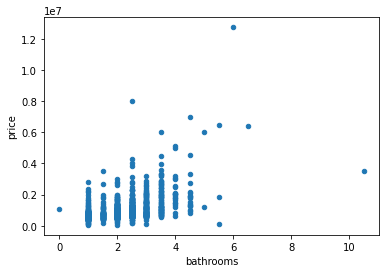

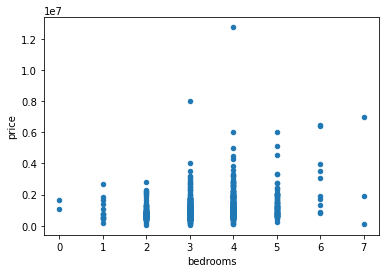

In [12]:
#plotting bathrooms and bedrooms to visually inspect the data

housedata_subset.sample(1000, random_state=1).plot.scatter(x=bathrooms, y="price");
housedata_subset.sample(1000, random_state=1).plot.scatter(x=bedrooms, y="price");

In [13]:
assert type(most_correlated) == str

assert most_correlated in housedata_subset.drop("price", axis=1).columns

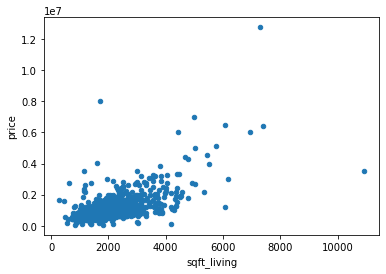

In [14]:
#plotting the strongest correlated variable to see if linear

housedata_subset.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

In [15]:
#creating model for strongest correlated variable just to see how I can improve it

y = housedata_subset["price"]
X_baseline = housedata_subset[[most_correlated]]


baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:51:09   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

In [16]:
y = housedata_subset["price"]
X_Correlation = housedata_subset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_patio', 'yr_built', 'lat', 'long']]


In [17]:
#second model to see how it improves when adding more variables

second_model = sm.OLS(y, sm.add_constant(X_Correlation))
second_results = second_model.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     2979.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:51:09   Log-Likelihood:            -4.4817e+05
No. Observations:               30155   AIC:                         8.964e+05
Df Residuals:                   30147   BIC:                         8.964e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         7.65e+06   3.35e+05     22.839      

In [18]:
assert type(house_condition) == str

assert house_condition in housedata_subset.select_dtypes("object").columns

In [19]:
X_iterated = housedata_subset[[most_correlated, house_condition, bedrooms, bathrooms, sqft_patio, yr_built, lat, long]]
X_iterated


,sqft_living,condition,bedrooms,bathrooms,sqft_patio,yr_built,lat,long
id,,,,,,,,
7399300360,1180,Good,4,1.0,40,1969,47.461975,-122.19052
8910500230,2770,Average,5,2.5,240,1950,47.711525,-122.35591
1180000275,2880,Average,6,2.0,0,1956,47.502045,-122.22520
1604601802,2160,Average,3,3.0,270,2010,47.566110,-122.29020
8562780790,1120,Average,2,2.0,30,2012,47.532470,-122.07188
...,...,...,...,...,...,...,...,...
7834800180,1910,Good,5,2.0,210,1921,47.664740,-122.32940
194000695,2020,Average,3,2.0,520,2011,47.565610,-122.38851
7960100080,1620,Average,3,2.0,110,1995,47.610395,-122.29585


In [20]:
#creating dummie variables from categorical data 

X_iterated = pd.get_dummies(X_iterated, columns=[house_condition])
X_iterated

,sqft_living,bedrooms,bathrooms,sqft_patio,yr_built,lat,long,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
id,,,,,,,,,,,,
7399300360,1180,4,1.0,40,1969,47.461975,-122.19052,False,False,True,False,False
8910500230,2770,5,2.5,240,1950,47.711525,-122.35591,True,False,False,False,False
1180000275,2880,6,2.0,0,1956,47.502045,-122.22520,True,False,False,False,False
1604601802,2160,3,3.0,270,2010,47.566110,-122.29020,True,False,False,False,False
8562780790,1120,2,2.0,30,2012,47.532470,-122.07188,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1910,5,2.0,210,1921,47.664740,-122.32940,False,False,True,False,False
194000695,2020,3,2.0,520,2011,47.565610,-122.38851,True,False,False,False,False
7960100080,1620,3,2.0,110,1995,47.610395,-122.29585,True,False,False,False,False


In [21]:
assert type(X_iterated) == pd.DataFrame

valid_col_nums = housedata_subset.select_dtypes("object").nunique() + 1

#assert X_iterated.shape[1] in valid_col_nums.values

In [22]:
#taking the space out of the column names

X_iterated.drop("condition_Poor", axis=1, inplace=True)

X_iterated.columns = X_iterated.columns.str.replace(' ', '')
X_iterated

,sqft_living,bedrooms,bathrooms,sqft_patio,yr_built,lat,long,condition_Average,condition_Fair,condition_Good,condition_VeryGood
id,,,,,,,,,,,
7399300360,1180,4,1.0,40,1969,47.461975,-122.19052,False,False,True,False
8910500230,2770,5,2.5,240,1950,47.711525,-122.35591,True,False,False,False
1180000275,2880,6,2.0,0,1956,47.502045,-122.22520,True,False,False,False
1604601802,2160,3,3.0,270,2010,47.566110,-122.29020,True,False,False,False
8562780790,1120,2,2.0,30,2012,47.532470,-122.07188,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1910,5,2.0,210,1921,47.664740,-122.32940,False,False,True,False
194000695,2020,3,2.0,520,2011,47.565610,-122.38851,True,False,False,False
7960100080,1620,3,2.0,110,1995,47.610395,-122.29585,True,False,False,False


In [23]:
#changing the values from strings to integers

X_iterated.condition_Average = X_iterated.condition_Average.replace({True:1, False:0})
X_iterated.condition_Fair = X_iterated.condition_Fair.replace({True:1, False:0})
X_iterated.condition_Good = X_iterated.condition_Good.replace({True:1, False:0})
X_iterated.condition_VeryGood = X_iterated.condition_VeryGood.replace({True:1, False:0})

In [24]:
#assert X_iterated.shape[1] in (valid_col_nums - 1).values

In [25]:
X_iterated

,sqft_living,bedrooms,bathrooms,sqft_patio,yr_built,lat,long,condition_Average,condition_Fair,condition_Good,condition_VeryGood
id,,,,,,,,,,,
7399300360,1180,4,1.0,40,1969,47.461975,-122.19052,0,0,1,0
8910500230,2770,5,2.5,240,1950,47.711525,-122.35591,1,0,0,0
1180000275,2880,6,2.0,0,1956,47.502045,-122.22520,1,0,0,0
1604601802,2160,3,3.0,270,2010,47.566110,-122.29020,1,0,0,0
8562780790,1120,2,2.0,30,2012,47.532470,-122.07188,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1910,5,2.0,210,1921,47.664740,-122.32940,0,0,1,0
194000695,2020,3,2.0,520,2011,47.565610,-122.38851,1,0,0,0
7960100080,1620,3,2.0,110,1995,47.610395,-122.29585,1,0,0,0


In [26]:
#third model that includes the newly created integer categorical data

iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     1898.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:51:09   Log-Likelihood:            -4.4816e+05
No. Observations:               30155   AIC:                         8.963e+05
Df Residuals:                   30143   BIC:                         8.964e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.733e+06   3.56

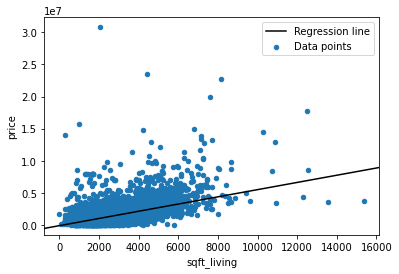

In [27]:
fig, ax = plt.subplots()
housedata_subset.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

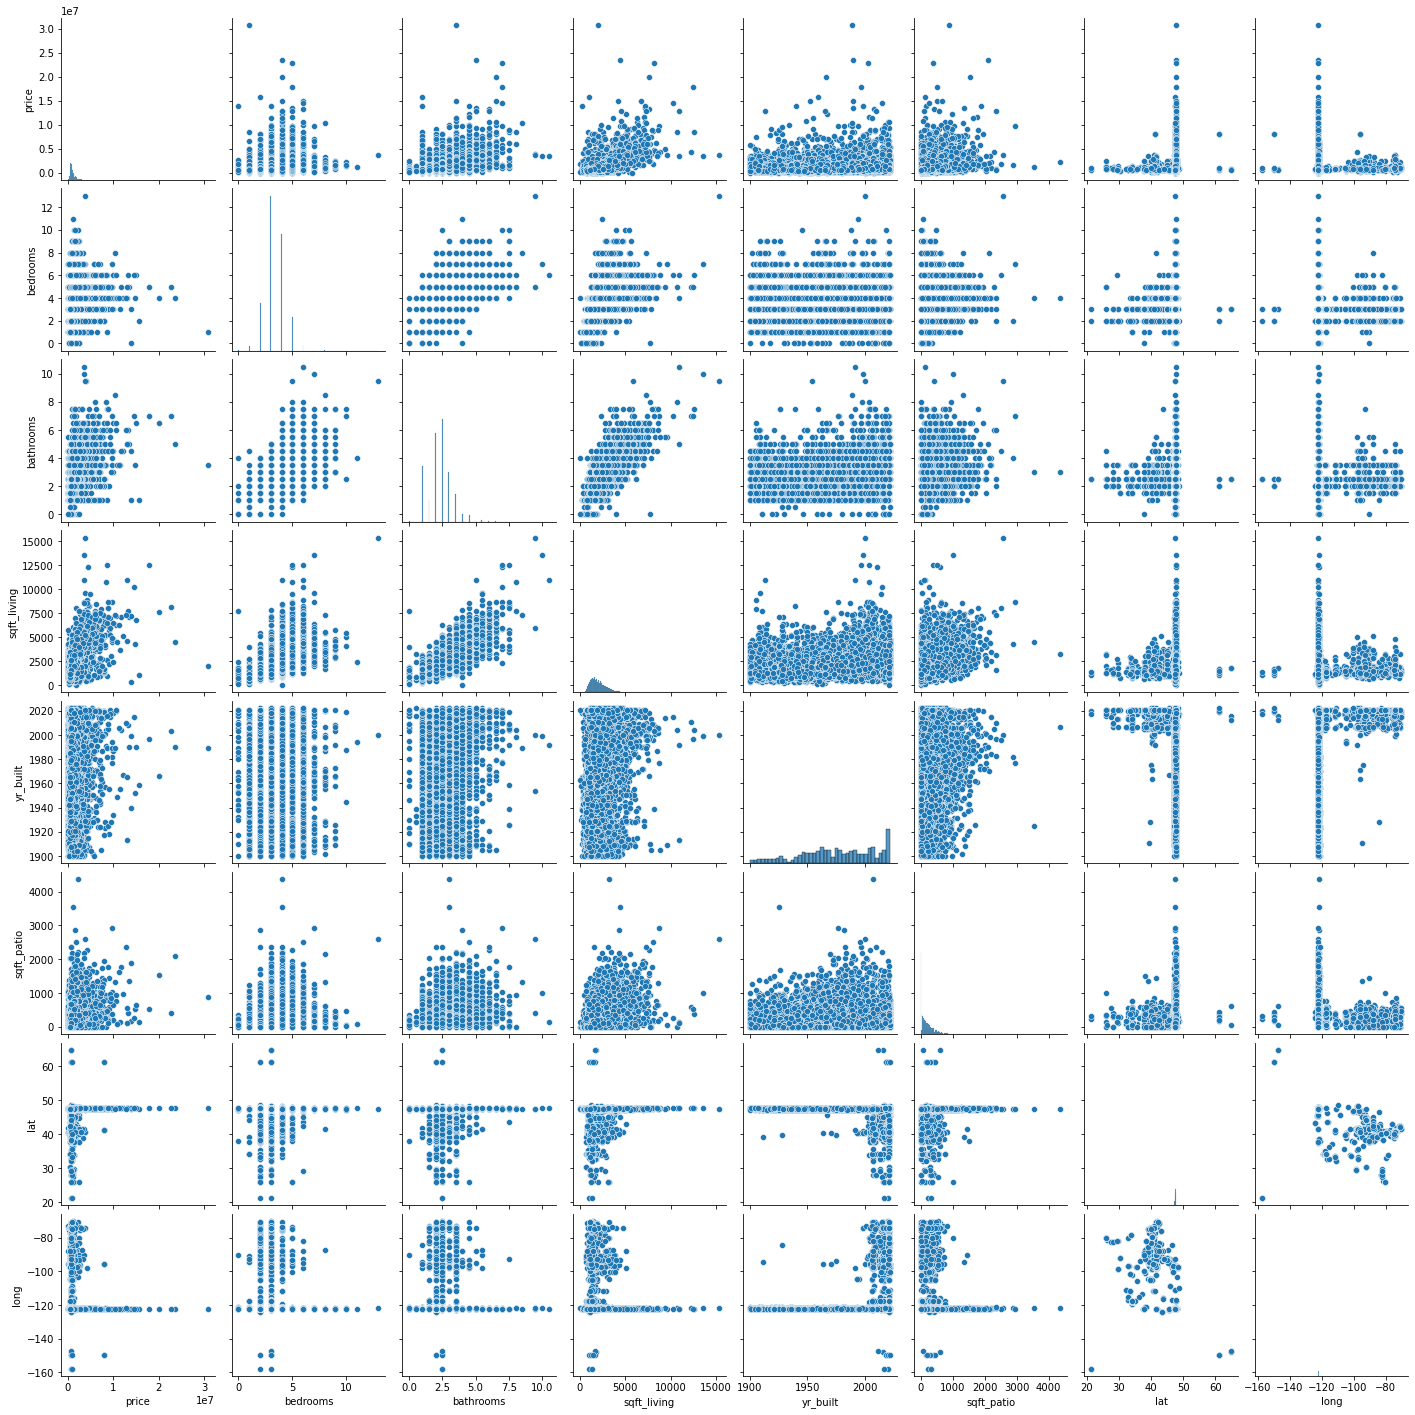

In [28]:
sns.pairplot(housedata_subset)

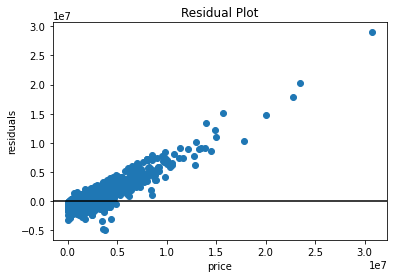

In [64]:
#plotting the residuals from the third model

y = housedata_subset["price"]
X = X_iterated
 
non_linear_model = sm.OLS(y, sm.add_constant(X_iterated))
non_linear_results = non_linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, non_linear_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals")
ax.set_title("Residual Plot");

In [66]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(X_iterated)

TypeError: res must be a results instance from a linear model.

# Conclusions

# Limitations

# Recommendations

# Next Steps